In [ ]:
import pandas as pd
from glob import glob
import os
from natsort import natsorted
import cv2
import numpy as np
from tqdm import tqdm
import modules.preprocess as pp
from sklearn.linear_model import LinearRegression
import math

import matplotlib.pyplot as plt

: 

In [ ]:
!pip install ipykernel

: 

In [2]:
_path_list = natsorted(glob('/home/VirtualFlaw/Hyun/IMAGE/ALL/*'))
path_list = []
for path in _path_list:
    path_list += natsorted(glob(path + '/*'))

In [29]:
def detect_weld(image, padding=0):
    """Returns the y1 and y2 of the weld. y1 is the top of the weld and y2 is the bottom of the weld

    Args:
        image (cv2.image): Image to find the weld

    Raises:
        Exception: If y1 or y2 is out of range
        
    Returns:
        _type_: tuple
    """
    image = cv2.resize(image, (1024, 1024))
    image = np.array(image, dtype=np.float32)
    image = cv2.GaussianBlur(image, (31,31), 0)

    for i in range(10):
        image = np.split(image, 2, axis=0)
        image = np.add(image[0], image[1])
        
    image = np.gradient(np.squeeze(image))
    image = np.gradient(np.squeeze(image))
    #최소값 찾기
    min_value = np.min(image)
    #인덱스 찾기
    min_index = np.where(image == min_value)
    return min_value, min_index

In [38]:
for dir in tqdm(path_list):
    category = dir.split('/')[-1]
    centering_dir = dir + '/centering'
    image_list = natsorted(glob(centering_dir + '/*'))
    for image_path in image_list:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
        image = 255 - image
        image = cv2.resize(image, (1024, 1024))
        cv2.imwrite(image_path, image, [cv2.IMWRITE_JPEG_QUALITY, 100])
        
    #이거 지우면 다 돌아감

  4%|▍         | 93/2139 [04:25<1:37:17,  2.85s/it]


KeyboardInterrupt: 

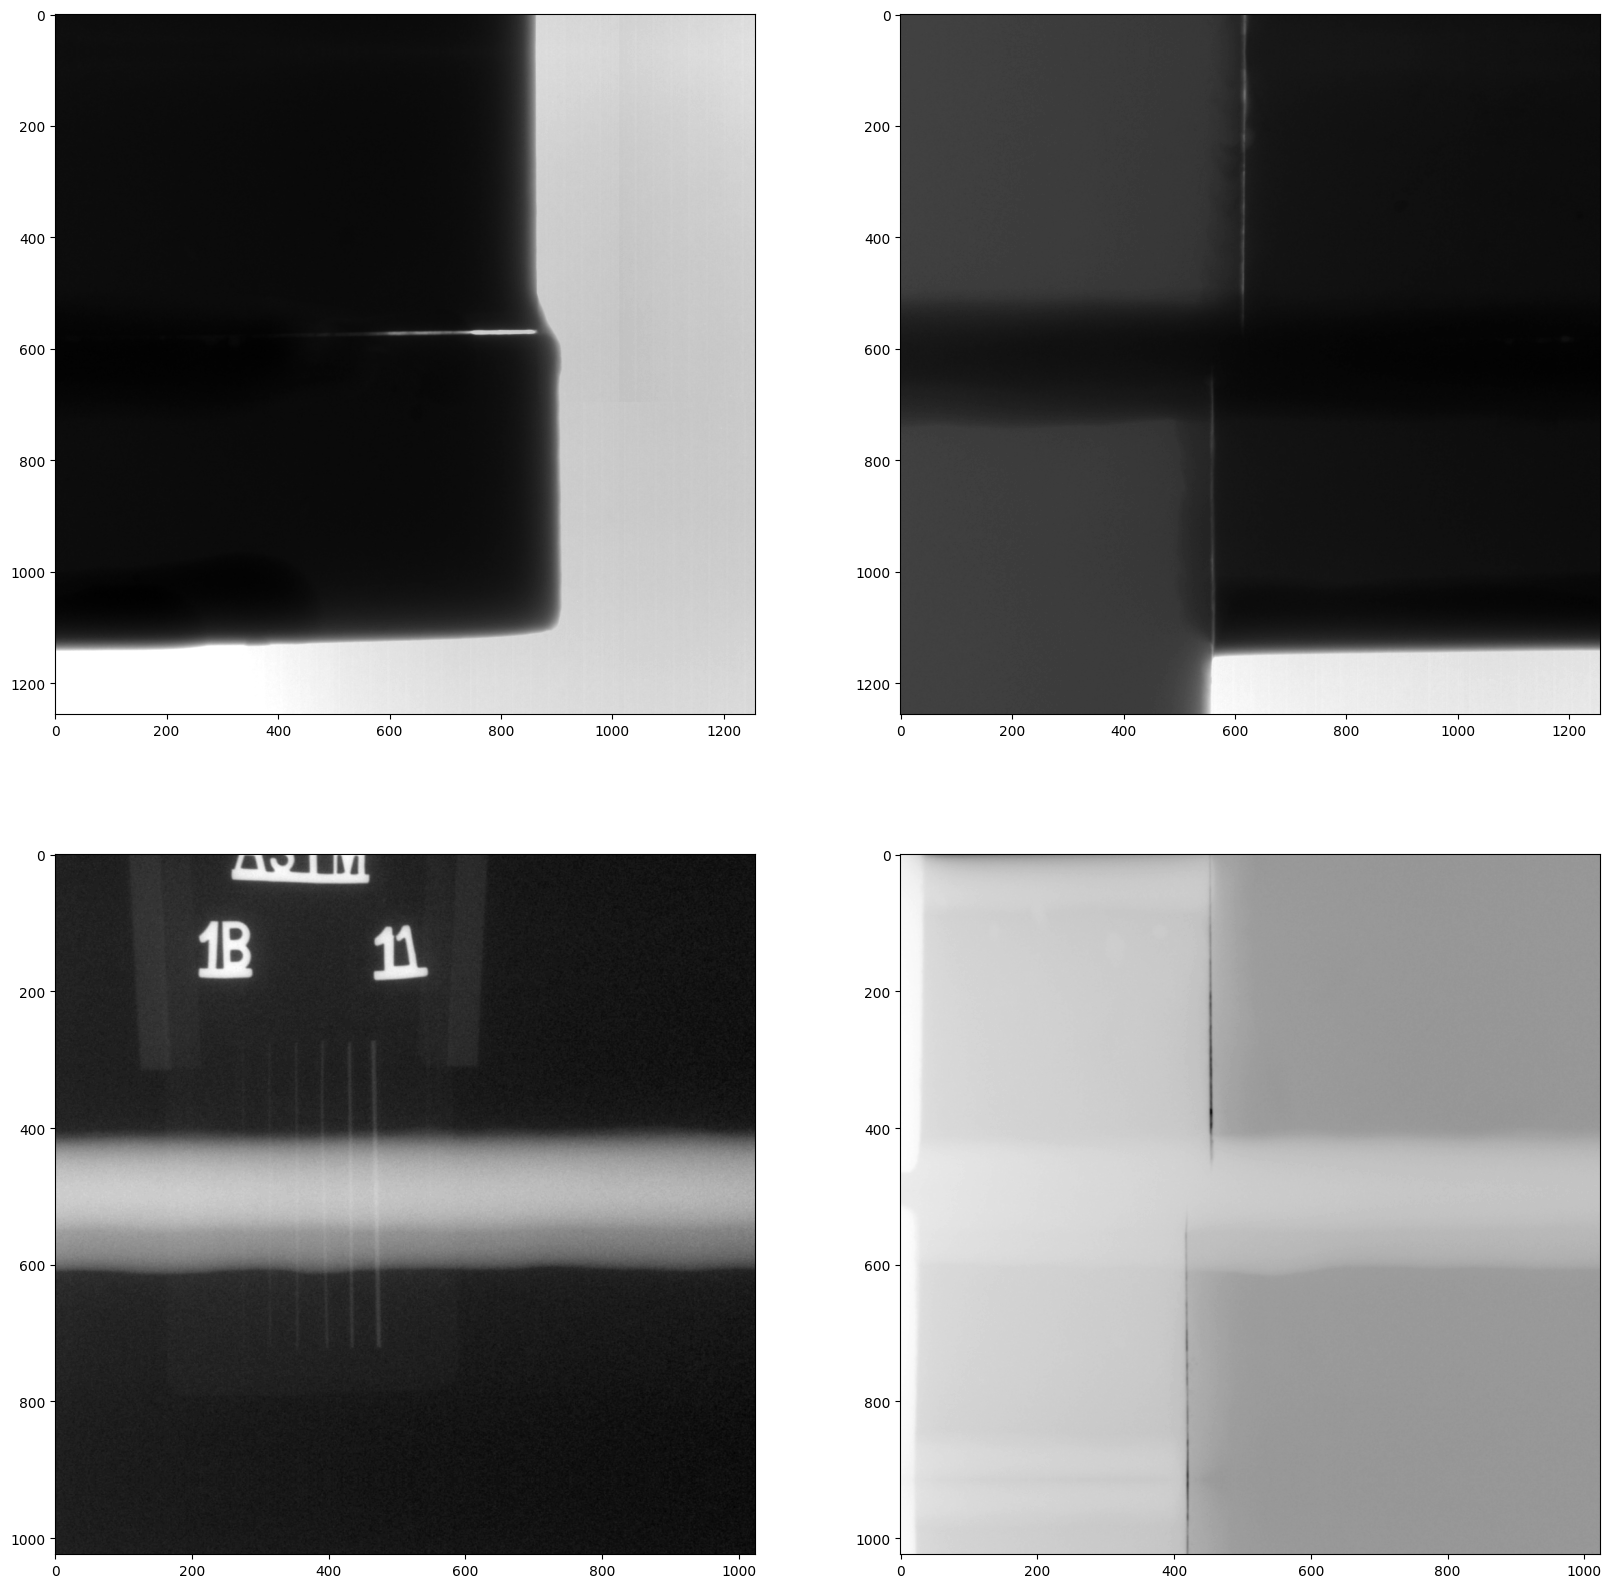

In [40]:
image_path = "/home/VirtualFlaw/Hyun/IMAGE/ALL/7.92/22G009-01-003"
value_list = []
for image_path in image_list:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    value, index = detect_weld(image)
    value_list.append({'value': value, 'index': index, 'path': image_path})
    
#value가 가장 작은 값 찾기. sort.
value_list = sorted(value_list, key=lambda x: x['value'])
#가장 작은 값의 인덱스
min_index1 = value_list[0]['index']
min_index2 = value_list[1]['index']

#4개 이미지 시각화
image1 = cv2.imread(value_list[0]['path'], cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(value_list[1]['path'], cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread(value_list[2]['path'], cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread(value_list[3]['path'], cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(image3, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(image4, cmap='gray')
plt.show()

        